<a href="https://colab.research.google.com/github/adityamishra5050/Neural-network-on-the-Gurmukhi-dataset/blob/main/DL_ASS_2_Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question 2 :**

In [ ]:
import os                                 #importing pytorch , numpy and matplotlib libraries for different task
import numpy as np                        # but the given task are implemented from scratch as directed in the Asssignment 1
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import torch.utils.data as data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torchvision.utils import make_grid

In [ ]:
transform_tensor = transforms.ToTensor() #Tensors are defined by their transformation properties under coordinate change

In [ ]:
# define the path for data extraction for val set
given_folder_val_grumuki_path = '/content/drive/MyDrive/GurNum/val'
# define the path for data extraction for training set
given_folder_train_grumuki_path= '/content/drive/MyDrive/GurNum/train'

In [ ]:
# namming the trainig data set as given below
given_train_data = torchvision.datasets.ImageFolder(root = given_folder_train_grumuki_path , transform = transform_tensor )
# namming the test data set as given below
given_test_data = torchvision.datasets.ImageFolder(root = given_folder_val_grumuki_path , transform = transform_tensor )

In [ ]:
# length of trainig data
len(given_train_data)

1000

In [ ]:
# length of testing data
len(given_test_data)

178

In [ ]:
# finding the label of classes
classes = given_train_data.classes
classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
torch.manual_seed(43)
preffered_val_size = 100
train_size = len(given_train_data) - preffered_val_size

In [ ]:
# splitting the training data into training and validation set
train_ds, val_ds = random_split(given_train_data, [train_size, preffered_val_size])
# finding the length of training and validation set
len(train_ds), len(val_ds)

(900, 100)

In [ ]:
# defining the batch size of the data
data_batch_size=50

In [ ]:
# loading the training data for further processing
data_train_loader = DataLoader(train_ds, data_batch_size, shuffle=True, num_workers=4, pin_memory=True)
# loading the validation data for further processing
data_val_loader = DataLoader(val_ds, data_batch_size*2, num_workers=4, pin_memory=True)
# loading the testing data for further processing
data_test_loader = DataLoader(given_test_data, data_batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape: torch.Size([50, 3, 32, 32])


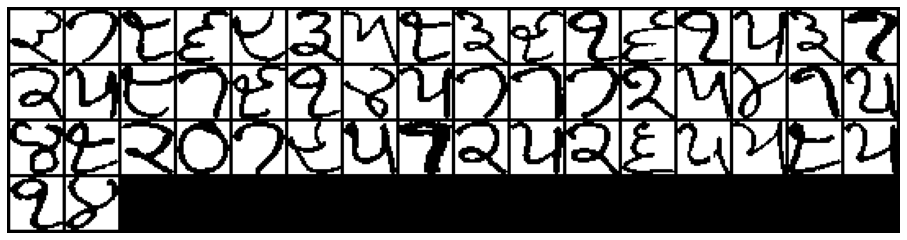

In [ ]:
# for having a view for the given data
for images, _ in data_train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
# for finding out the accuracy of the model
def model_accuracy(outputs, data_labels):
    _, got_preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(got_preds == data_labels).item() / len(got_preds))

**1.) L1 regularization from scratch**

In [ ]:
# creating a class GurmukhiClassification for the model training and other processing as defined below under the class
# there are the folloeing functions included under the class
# 1) model_training
# 2) model_validation
# 3) validation_epoch_end
# 4) epoch_end
class GurmukhiClassification(nn.Module):
    def model_training(self, batch):
        images, data_labels = batch
        out = self(images)                  # for getting the predictions by the model
        model_loss = F.cross_entropy(out, data_labels) # for getting the model_loss
        l1regu = 0
        for param in model.parameters() :
          l1regu +=param.abs().sum()
          lr_rate=0.00001
        model_loss +=lr_rate*l1regu
        return model_loss

    def model_validation(self, batch):
        images, data_labels = batch
        out = self(images)                    # for getting the predictions by the model
        model_loss = F.cross_entropy(out, data_labels)   #for getting the model_loss
        acc = model_accuracy(out, data_labels)           # for getting the model_accuracy
        return {'val_model_loss': model_loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_model_losses = [x['val_model_loss'] for x in outputs]
        epoch_model_loss = torch.stack(batch_model_losses).mean()   # for getting the model_loss
        model_batch_accuracies = [x['val_acc'] for x in outputs]
        model_epoch_accuracy = torch.stack(model_batch_accuracies).mean()      # for combining the model_accuracy
        return {'val_model_loss': epoch_model_loss.item(), 'val_acc': model_epoch_accuracy.item()}

    def epoch_end(self, epoch, model_result):
        print("Epoch [{}], val_model_loss: {:.4f}, val_acc: {:.4f}".format(epoch, model_result['val_model_loss'], model_result['val_acc']))

In [ ]:
# creating a class GRUNUMMODEL for applying the neural network ,there are 5 layers in which one input and output layer and three hidden lyers
# And then we creted the two functions under this class as given below
# __init__()
# forward(,)
class GRUNUMModel(GurmukhiClassification):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [ ]:
#defining a function for the model evaluation
def model_evaluation(model, data_val_loader):
    outputs = [model.model_validation(batch) for batch in data_val_loader]
    return model.validation_epoch_end(outputs)

#defining a function for fitting the model in my data
def model_insetion(epochs, lr, model, data_train_loader, data_val_loader, opt_func=torch.optim.SGD):
    model_performance = []
    model_optimizer = opt_func(model.parameters(), lr)
    for epoch in range(20):
        # This are the training steps
        for batch in data_train_loader:
            model_loss = model.model_training(batch)
            model_loss.backward()
            model_optimizer.step()
            model_optimizer.zero_grad()
        # This are the validation steps
        model_result = model_evaluation(model, data_val_loader)
        model.epoch_end(epoch, model_result)
        model_performance.append(model_result)
    return model_performance

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# defining a function for GPU processing
def pick_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = pick_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# creating a class for loading the whole data for GPU processing
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# defining the function for getting the graph of the model performance of model loss
def graph_of_model_losses(model_performance):
    model_losses = [x['val_model_loss'] for x in model_performance]
    plt.figure(figsize=(10,6))
    plt.plot(model_losses, '-o')
    plt.xlabel('epoch')
    plt.ylabel('model_loss')
    plt.title('model_loss vs. No. of epochs');

In [ ]:
# defining the function for getting the graph of the model performance of model accuracy
def graph_of_model_accuracies(ccuraciesmodel_performance):
    accuracies = [x['val_acc'] for x in model_performance]
    plt.figure(figsize=(10,6))
    plt.plot(accuracies, '-o')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
# loading the data_train to DeviceDataLoader
data_train_loader = DeviceDataLoader(data_train_loader, device)
# loading the data_val to DeviceDataLoader
data_val_loader = DeviceDataLoader(data_val_loader, device)
# loading the data_test to DeviceDataLoader
data_test_loader = DeviceDataLoader(data_test_loader, device)

In [ ]:
input_size = 3*32*32
output_size = 10

In [ ]:
# defining the model to the name 'model'
model = to_device(GRUNUMModel(), device)

In [ ]:
# finding out the model performance for forward pass
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

[{'val_model_loss': 2.3055484294891357, 'val_acc': 0.10999999940395355}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.2195, val_acc: 0.0600
Epoch [1], val_model_loss: 1.6687, val_acc: 0.3500
Epoch [2], val_model_loss: 1.3158, val_acc: 0.5200
Epoch [3], val_model_loss: 0.9600, val_acc: 0.5000
Epoch [4], val_model_loss: 0.9571, val_acc: 0.6300
Epoch [5], val_model_loss: 1.1089, val_acc: 0.6200
Epoch [6], val_model_loss: 0.5404, val_acc: 0.7700
Epoch [7], val_model_loss: 0.6695, val_acc: 0.7000
Epoch [8], val_model_loss: 0.4828, val_acc: 0.8300
Epoch [9], val_model_loss: 0.4844, val_acc: 0.8500
Epoch [10], val_model_loss: 0.4464, val_acc: 0.8300
Epoch [11], val_model_loss: 0.3747, val_acc: 0.8700
Epoch [12], val_model_loss: 0.5583, val_acc: 0.7800
Epoch [13], val_model_loss: 0.2658, val_acc: 0.9100
Epoch [14], val_model_loss: 0.2212, val_acc: 0.9400
Epoch [15], val_model_loss: 0.2598, val_acc: 0.9300
Epoch [16], val_model_loss: 1.0708, val_acc: 0.7700
Epoch [17], val_model_loss: 0.6057, val_acc: 0.8500
Epoch [18], val_model_loss: 0.4794, val_acc: 0.8800
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2753, val_acc: 0.9200
Epoch [1], val_model_loss: 0.2106, val_acc: 0.9300
Epoch [2], val_model_loss: 0.3044, val_acc: 0.9100
Epoch [3], val_model_loss: 0.2733, val_acc: 0.9400
Epoch [4], val_model_loss: 0.2672, val_acc: 0.9400
Epoch [5], val_model_loss: 0.2485, val_acc: 0.9500
Epoch [6], val_model_loss: 0.2091, val_acc: 0.9500
Epoch [7], val_model_loss: 0.2417, val_acc: 0.9500
Epoch [8], val_model_loss: 0.2500, val_acc: 0.9500
Epoch [9], val_model_loss: 0.2924, val_acc: 0.9400
Epoch [10], val_model_loss: 0.3027, val_acc: 0.9500
Epoch [11], val_model_loss: 0.2500, val_acc: 0.9500
Epoch [12], val_model_loss: 0.2714, val_acc: 0.9300
Epoch [13], val_model_loss: 0.2263, val_acc: 0.9500
Epoch [14], val_model_loss: 0.2273, val_acc: 0.9500
Epoch [15], val_model_loss: 0.2345, val_acc: 0.9500
Epoch [16], val_model_loss: 0.2444, val_acc: 0.9500
Epoch [17], val_model_loss: 0.2530, val_acc: 0.9500
Epoch [18], val_model_loss: 0.2585, val_acc: 0.9500
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2582, val_acc: 0.9500
Epoch [1], val_model_loss: 0.2595, val_acc: 0.9500
Epoch [2], val_model_loss: 0.2606, val_acc: 0.9500
Epoch [3], val_model_loss: 0.2611, val_acc: 0.9500
Epoch [4], val_model_loss: 0.2609, val_acc: 0.9500
Epoch [5], val_model_loss: 0.2613, val_acc: 0.9500
Epoch [6], val_model_loss: 0.2615, val_acc: 0.9500
Epoch [7], val_model_loss: 0.2618, val_acc: 0.9500
Epoch [8], val_model_loss: 0.2621, val_acc: 0.9500
Epoch [9], val_model_loss: 0.2618, val_acc: 0.9500
Epoch [10], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [11], val_model_loss: 0.2620, val_acc: 0.9500
Epoch [12], val_model_loss: 0.2619, val_acc: 0.9500
Epoch [13], val_model_loss: 0.2621, val_acc: 0.9500
Epoch [14], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [15], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [16], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [17], val_model_loss: 0.2622, val_acc: 0.9500
Epoch [18], val_model_loss: 0.2630, val_acc: 0.9500
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2623, val_acc: 0.9500
Epoch [1], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [2], val_model_loss: 0.2623, val_acc: 0.9500
Epoch [3], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [4], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [5], val_model_loss: 0.2624, val_acc: 0.9500
Epoch [6], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [7], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [8], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [9], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [10], val_model_loss: 0.2625, val_acc: 0.9500
Epoch [11], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [12], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [13], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [14], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [15], val_model_loss: 0.2627, val_acc: 0.9500
Epoch [16], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [17], val_model_loss: 0.2626, val_acc: 0.9500
Epoch [18], val_model_loss: 0.2627, val_acc: 0.9500
Epoch [19], val_model_

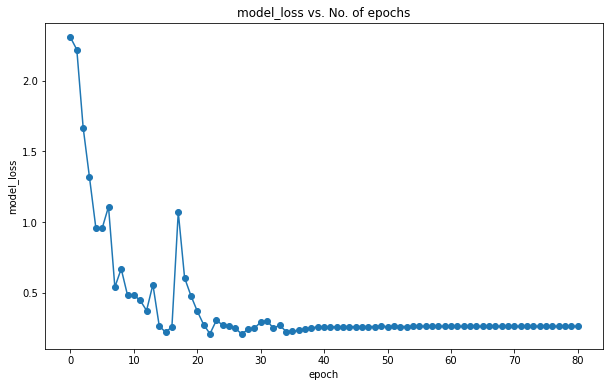

In [ ]:
graph_of_model_losses(model_performance)

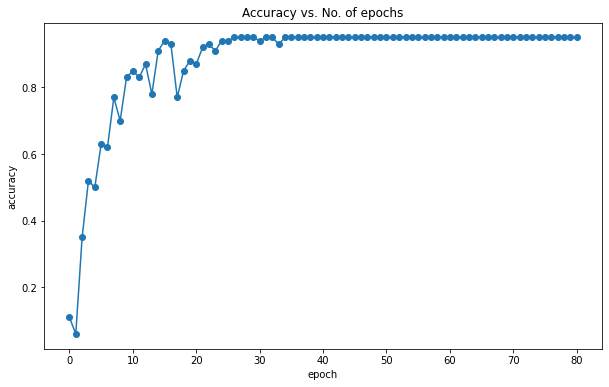

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 0.32646894454956055, 'val_acc': 0.9471794962882996}

**2.) L2 regularization from scratch**

In [ ]:
class GurmukhiClassification1(nn.Module):
    def model_training(self, batch):
        images, data_labels = batch
        out = self(images)                  # Generate predictions
        model_loss = F.cross_entropy(out, data_labels) # Calculate model_loss
        l1regu = 0
        for param in model.parameters() :
          l1regu +=param.pow(2.0).sum()
          lr_rate=0.0001
        model_loss +=lr_rate*l1regu
        return model_loss

    def model_validation(self, batch):
        images, data_labels = batch
        out = self(images)                    # Generate predictions
        model_loss = F.cross_entropy(out, data_labels)   # Calculate model_loss
        acc = model_accuracy(out, data_labels)           # Calculate accuracy
        return {'val_model_loss': model_loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_model_losses = [x['val_model_loss'] for x in outputs]
        epoch_model_loss = torch.stack(batch_model_losses).mean()   # Combine model_losses
        model_batch_accuracies = [x['val_acc'] for x in outputs]
        model_epoch_accuracy = torch.stack(model_batch_accuracies).mean()      # Combine accuracies
        return {'val_model_loss': epoch_model_loss.item(), 'val_acc': model_epoch_accuracy.item()}

    def epoch_end(self, epoch, model_result):
        print("Epoch [{}], val_model_loss: {:.4f}, val_acc: {:.4f}".format(epoch, model_result['val_model_loss'], model_result['val_acc']))

In [ ]:
class GRUNUMModel(GurmukhiClassification1):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [ ]:
model = to_device(GRUNUMModel(), device)

In [ ]:
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

[{'val_model_loss': 2.3056740760803223, 'val_acc': 0.10999999940395355}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.5390, val_acc: 0.1300
Epoch [1], val_model_loss: 2.0872, val_acc: 0.1600
Epoch [2], val_model_loss: 2.3369, val_acc: 0.0600
Epoch [3], val_model_loss: 2.3251, val_acc: 0.0600
Epoch [4], val_model_loss: 2.3167, val_acc: 0.0600
Epoch [5], val_model_loss: 2.3127, val_acc: 0.1000
Epoch [6], val_model_loss: 2.3115, val_acc: 0.0800
Epoch [7], val_model_loss: 2.3110, val_acc: 0.0600
Epoch [8], val_model_loss: 2.3098, val_acc: 0.0600
Epoch [9], val_model_loss: 2.3108, val_acc: 0.0300
Epoch [10], val_model_loss: 2.3106, val_acc: 0.0600
Epoch [11], val_model_loss: 2.3090, val_acc: 0.0600
Epoch [12], val_model_loss: 2.3092, val_acc: 0.0600
Epoch [13], val_model_loss: 2.3106, val_acc: 0.0600
Epoch [14], val_model_loss: 2.3105, val_acc: 0.0600
Epoch [15], val_model_loss: 2.3102, val_acc: 0.0600
Epoch [16], val_model_loss: 2.3097, val_acc: 0.0600
Epoch [17], val_model_loss: 2.3104, val_acc: 0.0600
Epoch [18], val_model_loss: 2.3090, val_acc: 0.0600
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.3097, val_acc: 0.0800
Epoch [1], val_model_loss: 2.3092, val_acc: 0.0800
Epoch [2], val_model_loss: 1.9877, val_acc: 0.1900
Epoch [3], val_model_loss: 1.6661, val_acc: 0.3400
Epoch [4], val_model_loss: 1.3556, val_acc: 0.4200
Epoch [5], val_model_loss: 1.4798, val_acc: 0.3200
Epoch [6], val_model_loss: 1.2658, val_acc: 0.4300
Epoch [7], val_model_loss: 1.1577, val_acc: 0.5100
Epoch [8], val_model_loss: 1.0924, val_acc: 0.5000
Epoch [9], val_model_loss: 1.0225, val_acc: 0.5400
Epoch [10], val_model_loss: 1.0250, val_acc: 0.5500
Epoch [11], val_model_loss: 0.8827, val_acc: 0.5300
Epoch [12], val_model_loss: 0.7527, val_acc: 0.6300
Epoch [13], val_model_loss: 0.5969, val_acc: 0.7400
Epoch [14], val_model_loss: 0.5965, val_acc: 0.7200
Epoch [15], val_model_loss: 0.4614, val_acc: 0.8100
Epoch [16], val_model_loss: 0.4767, val_acc: 0.8100
Epoch [17], val_model_loss: 0.3401, val_acc: 0.8500
Epoch [18], val_model_loss: 0.6366, val_acc: 0.7700
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.3222, val_acc: 0.9000
Epoch [1], val_model_loss: 0.3111, val_acc: 0.9100
Epoch [2], val_model_loss: 0.3076, val_acc: 0.9000
Epoch [3], val_model_loss: 0.3023, val_acc: 0.9000
Epoch [4], val_model_loss: 0.2998, val_acc: 0.9100
Epoch [5], val_model_loss: 0.2962, val_acc: 0.9100
Epoch [6], val_model_loss: 0.2936, val_acc: 0.9100
Epoch [7], val_model_loss: 0.2921, val_acc: 0.9100
Epoch [8], val_model_loss: 0.2910, val_acc: 0.9100
Epoch [9], val_model_loss: 0.2895, val_acc: 0.9100
Epoch [10], val_model_loss: 0.2912, val_acc: 0.9100
Epoch [11], val_model_loss: 0.2879, val_acc: 0.9100
Epoch [12], val_model_loss: 0.2887, val_acc: 0.9100
Epoch [13], val_model_loss: 0.2861, val_acc: 0.9100
Epoch [14], val_model_loss: 0.2880, val_acc: 0.9100
Epoch [15], val_model_loss: 0.2848, val_acc: 0.9100
Epoch [16], val_model_loss: 0.2853, val_acc: 0.9100
Epoch [17], val_model_loss: 0.2841, val_acc: 0.9100
Epoch [18], val_model_loss: 0.2837, val_acc: 0.9100
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2831, val_acc: 0.9100
Epoch [1], val_model_loss: 0.2834, val_acc: 0.9100
Epoch [2], val_model_loss: 0.2837, val_acc: 0.9100
Epoch [3], val_model_loss: 0.2833, val_acc: 0.9100
Epoch [4], val_model_loss: 0.2832, val_acc: 0.9100
Epoch [5], val_model_loss: 0.2836, val_acc: 0.9100
Epoch [6], val_model_loss: 0.2834, val_acc: 0.9100
Epoch [7], val_model_loss: 0.2829, val_acc: 0.9100
Epoch [8], val_model_loss: 0.2833, val_acc: 0.9100
Epoch [9], val_model_loss: 0.2833, val_acc: 0.9100
Epoch [10], val_model_loss: 0.2831, val_acc: 0.9100
Epoch [11], val_model_loss: 0.2831, val_acc: 0.9100
Epoch [12], val_model_loss: 0.2832, val_acc: 0.9100
Epoch [13], val_model_loss: 0.2834, val_acc: 0.9100
Epoch [14], val_model_loss: 0.2833, val_acc: 0.9100
Epoch [15], val_model_loss: 0.2828, val_acc: 0.9100
Epoch [16], val_model_loss: 0.2828, val_acc: 0.9100
Epoch [17], val_model_loss: 0.2827, val_acc: 0.9100
Epoch [18], val_model_loss: 0.2828, val_acc: 0.9100
Epoch [19], val_model_

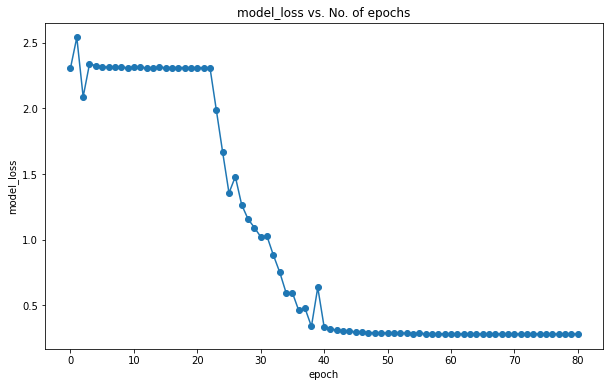

In [ ]:
graph_of_model_losses(model_performance)

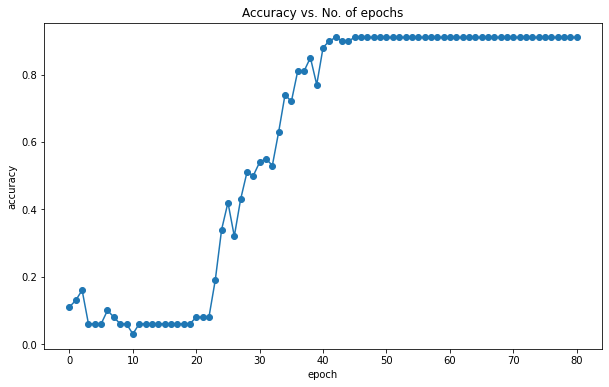

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 0.5981614589691162, 'val_acc': 0.8151282072067261}

**3) Dropout from scratch**

In [ ]:
class GRUNUMModel(GurmukhiClassification):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.25)

    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [ ]:
class GurmukhiClassification(nn.Module):
    def model_training(self, batch):
        images, data_labels = batch
        out = self(images)                  # Generate predictions
        model_loss = F.cross_entropy(out, data_labels) # Calculate model_loss
        return model_loss

    def model_validation(self, batch):
        images, data_labels = batch
        out = self(images)                    # Generate predictions
        lambda2 = 0.01
        # all_linear2_params = torch.cat([x.view(-1) for x in model.linear2.parameters()])
        # l2_regularization = lambda2 * torch.norm(all_linear2_params, 2)
        # model_loss = F.cross_entropy(out, data_labels) + l2_regularization  # Calculate model_loss
        model_loss = F.cross_entropy(out, data_labels)
        acc = model_accuracy(out, data_labels)           # Calculate accuracy
        return {'val_model_loss': model_loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_model_losses = [x['val_model_loss'] for x in outputs]
        epoch_model_loss = torch.stack(batch_model_losses).mean()   # Combine model_losses
        model_batch_accuracies = [x['val_acc'] for x in outputs]
        model_epoch_accuracy = torch.stack(model_batch_accuracies).mean()      # Combine accuracies
        return {'val_model_loss': epoch_model_loss.item(), 'val_acc': model_epoch_accuracy.item()}

    def epoch_end(self, epoch, model_result):
        print("Epoch [{}], val_model_loss: {:.4f}, val_acc: {:.4f}".format(epoch, model_result['val_model_loss'], model_result['val_acc']))

In [ ]:
model = to_device(GRUNUMModel(), device)

In [ ]:
model_performance = [model_evaluation(model, data_val_loader)]
model_performance

[{'val_model_loss': 2.303032159805298, 'val_acc': 0.07999999821186066}]

In [ ]:
model_performance += model_insetion(10,0.01, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 2.2910, val_acc: 0.1100
Epoch [1], val_model_loss: 1.7416, val_acc: 0.2500
Epoch [2], val_model_loss: 1.5116, val_acc: 0.3400
Epoch [3], val_model_loss: 1.3533, val_acc: 0.3800
Epoch [4], val_model_loss: 1.0603, val_acc: 0.6000
Epoch [5], val_model_loss: 0.8003, val_acc: 0.6400
Epoch [6], val_model_loss: 0.8455, val_acc: 0.6000
Epoch [7], val_model_loss: 0.6910, val_acc: 0.6600
Epoch [8], val_model_loss: 0.8236, val_acc: 0.5800
Epoch [9], val_model_loss: 0.6453, val_acc: 0.6600
Epoch [10], val_model_loss: 0.4279, val_acc: 0.8100
Epoch [11], val_model_loss: 0.6309, val_acc: 0.7400
Epoch [12], val_model_loss: 0.5837, val_acc: 0.7800
Epoch [13], val_model_loss: 0.4373, val_acc: 0.8000
Epoch [14], val_model_loss: 0.5169, val_acc: 0.7900
Epoch [15], val_model_loss: 0.6643, val_acc: 0.7600
Epoch [16], val_model_loss: 0.5265, val_acc: 0.7800
Epoch [17], val_model_loss: 0.5151, val_acc: 0.7900
Epoch [18], val_model_loss: 0.4264, val_acc: 0.8100
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(20, 0.001 , model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.3576, val_acc: 0.8200
Epoch [1], val_model_loss: 0.3692, val_acc: 0.8300
Epoch [2], val_model_loss: 0.2259, val_acc: 0.8500
Epoch [3], val_model_loss: 0.3908, val_acc: 0.8300
Epoch [4], val_model_loss: 0.4007, val_acc: 0.8400
Epoch [5], val_model_loss: 0.3882, val_acc: 0.8000
Epoch [6], val_model_loss: 0.2991, val_acc: 0.8200
Epoch [7], val_model_loss: 0.2635, val_acc: 0.8500
Epoch [8], val_model_loss: 0.2624, val_acc: 0.8500
Epoch [9], val_model_loss: 0.3163, val_acc: 0.8400
Epoch [10], val_model_loss: 0.2358, val_acc: 0.8600
Epoch [11], val_model_loss: 0.2659, val_acc: 0.8800
Epoch [12], val_model_loss: 0.4950, val_acc: 0.8300
Epoch [13], val_model_loss: 0.1989, val_acc: 0.8800
Epoch [14], val_model_loss: 0.2626, val_acc: 0.8600
Epoch [15], val_model_loss: 0.3408, val_acc: 0.8600
Epoch [16], val_model_loss: 0.3069, val_acc: 0.8300
Epoch [17], val_model_loss: 0.2644, val_acc: 0.8600
Epoch [18], val_model_loss: 0.3452, val_acc: 0.8600
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.00001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2643, val_acc: 0.8600
Epoch [1], val_model_loss: 0.2503, val_acc: 0.9000
Epoch [2], val_model_loss: 0.2249, val_acc: 0.8800
Epoch [3], val_model_loss: 0.3981, val_acc: 0.8500
Epoch [4], val_model_loss: 0.2173, val_acc: 0.9000
Epoch [5], val_model_loss: 0.2819, val_acc: 0.8600
Epoch [6], val_model_loss: 0.2026, val_acc: 0.8800
Epoch [7], val_model_loss: 0.2295, val_acc: 0.8800
Epoch [8], val_model_loss: 0.2959, val_acc: 0.8700
Epoch [9], val_model_loss: 0.2139, val_acc: 0.8700
Epoch [10], val_model_loss: 0.2624, val_acc: 0.8700
Epoch [11], val_model_loss: 0.2338, val_acc: 0.8700
Epoch [12], val_model_loss: 0.2363, val_acc: 0.8900
Epoch [13], val_model_loss: 0.2489, val_acc: 0.8700
Epoch [14], val_model_loss: 0.2162, val_acc: 0.9100
Epoch [15], val_model_loss: 0.2113, val_acc: 0.9000
Epoch [16], val_model_loss: 0.2331, val_acc: 0.9100
Epoch [17], val_model_loss: 0.2575, val_acc: 0.8900
Epoch [18], val_model_loss: 0.2650, val_acc: 0.8900
Epoch [19], val_model_

In [ ]:
model_performance += model_insetion(10, 0.000001, model, data_train_loader, data_val_loader, torch.optim.Adam)

Epoch [0], val_model_loss: 0.2551, val_acc: 0.9000
Epoch [1], val_model_loss: 0.2374, val_acc: 0.8900
Epoch [2], val_model_loss: 0.2813, val_acc: 0.8600
Epoch [3], val_model_loss: 0.2459, val_acc: 0.8800
Epoch [4], val_model_loss: 0.2348, val_acc: 0.8900
Epoch [5], val_model_loss: 0.2858, val_acc: 0.8900
Epoch [6], val_model_loss: 0.2054, val_acc: 0.9100
Epoch [7], val_model_loss: 0.2088, val_acc: 0.9100
Epoch [8], val_model_loss: 0.2718, val_acc: 0.9200
Epoch [9], val_model_loss: 0.2736, val_acc: 0.8800
Epoch [10], val_model_loss: 0.2564, val_acc: 0.8600
Epoch [11], val_model_loss: 0.2153, val_acc: 0.9100
Epoch [12], val_model_loss: 0.3399, val_acc: 0.8900
Epoch [13], val_model_loss: 0.2798, val_acc: 0.8700
Epoch [14], val_model_loss: 0.1909, val_acc: 0.8800
Epoch [15], val_model_loss: 0.2913, val_acc: 0.8500
Epoch [16], val_model_loss: 0.2360, val_acc: 0.8700
Epoch [17], val_model_loss: 0.1853, val_acc: 0.9000
Epoch [18], val_model_loss: 0.2302, val_acc: 0.9100
Epoch [19], val_model_

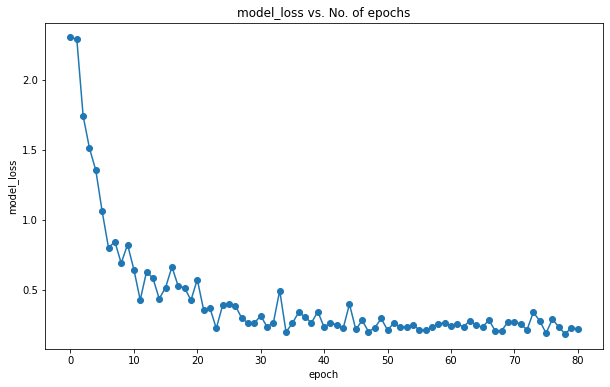

In [ ]:
graph_of_model_losses(model_performance)

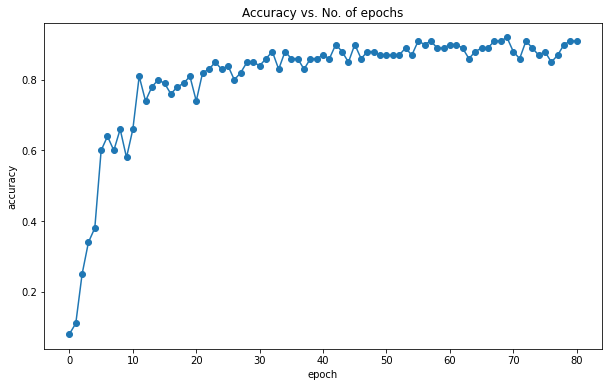

In [ ]:
graph_of_model_accuracies(model_performance)

In [ ]:
model_evaluation(model, data_test_loader)

{'val_model_loss': 0.3804469704627991, 'val_acc': 0.8843590021133423}